Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('D:/dataset/Gold Price/gold_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Dropping date column because we want see the correlation between 4 features in the dataset except date

In [9]:
gold_data_nodate = gold_data.drop('Date', axis=1)

In [10]:
gold_data_nodate.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


Correlation:
1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = gold_data_nodate.corr()

<AxesSubplot:>

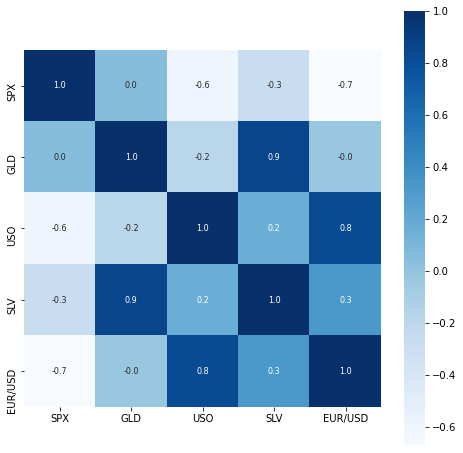

In [12]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


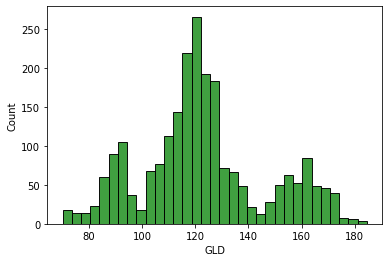

In [17]:
# Checking the distribution of the 'GLD' column
sns.histplot(data=gold_data, x='GLD', color='green')

# Display the plot
plt.show()

Splitting the Features and Target

In [18]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [24]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.53989903  81.93029976 116.21110011 127.61040115 120.63210114
 154.88889751 150.24869822 126.1554002  117.43259859 125.85130134
 116.52730095 171.26030058 141.3058983  167.56239853 115.13639992
 117.61690069 138.46180344 170.10790016 158.8630036  159.49309897
 155.23040046 125.03490008 175.51999978 156.76830252 125.25120028
  93.68699961  77.79130012 120.49960012 119.0538992  167.39389954
  87.88380043 125.33700026  91.24960061 117.70989995 121.0971991
 136.77930107 115.63110096 115.35250073 147.60669997 106.70320075
 104.3616027   87.08379762 126.55350067 118.03299983 153.09709918
 119.39610005 108.43299943 108.03629828  93.15940031 126.93339796
  74.6543006  113.66789937 121.09349995 111.33939901 119.12229903
 120.3186     159.19550056 168.20070099 147.01279692  85.77579859
  94.21190025  86.85849929  90.64100032 118.98540063 126.30600063
 127.57870068 170.25519973 122.29479948 117.34809919  98.51009998
 168.50550203 143.16569906 132.11000213 121.26960228 121.84399947
 119.905400

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891622941086206


Compare the Actual Values and Predicted Values in a Plot

In [27]:
Y_test = list(Y_test)

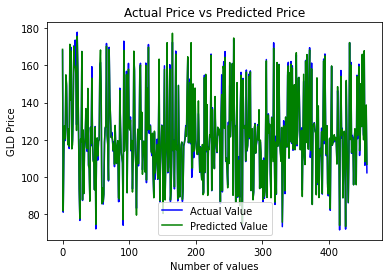

In [28]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()